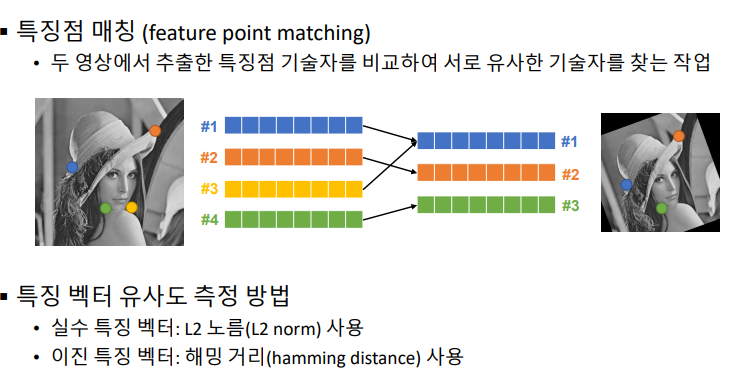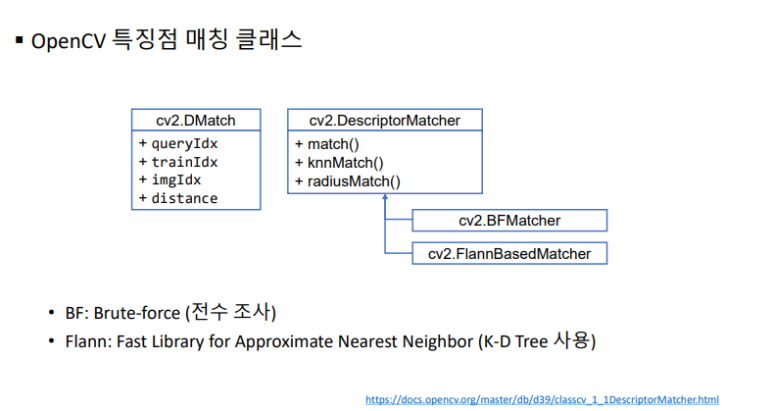

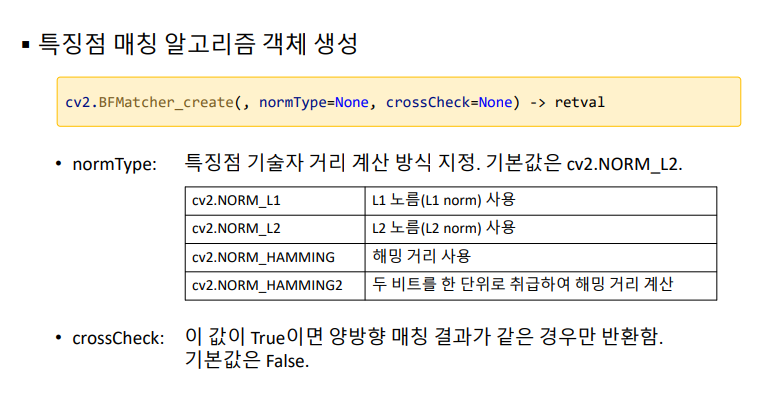
실수일때에는 L2norm을 쓰는것이 일반적이며 해밍Distance를 쓸 때에는 이진 기술자를 사용합니다. CrossCheck의 기본값은 False입니다. True를 주면 1번과 2번영상 양방향으로 비교해서 매칭해 반환하기에 더 정확은 하지만 그냥 False를 해도 무난합니다.

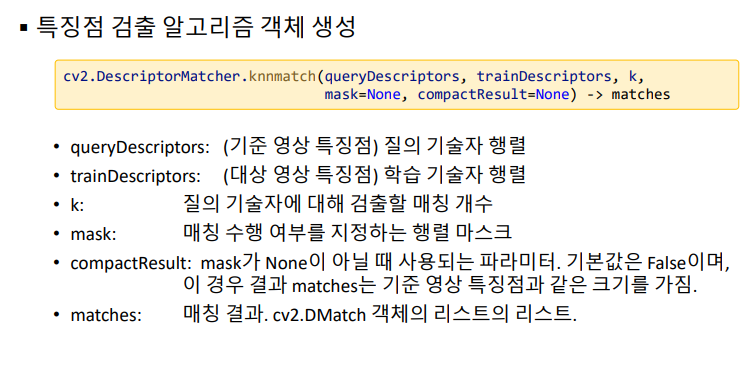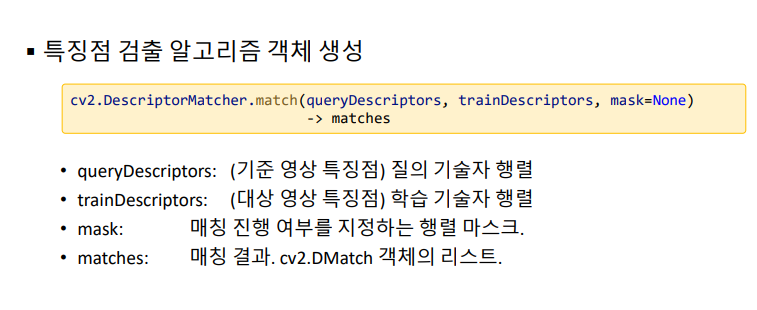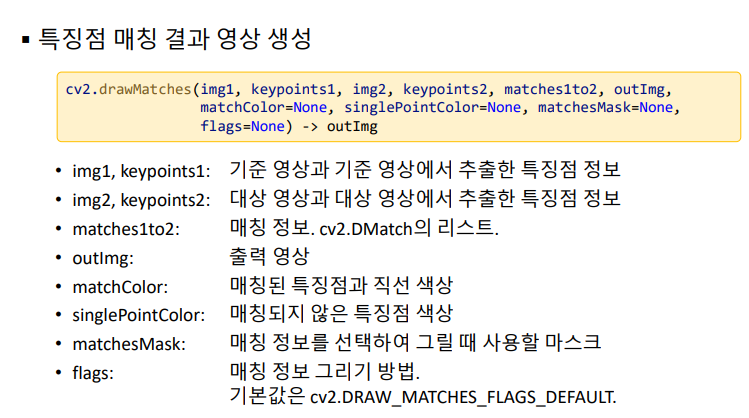

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

In [2]:
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)

src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)


if src1 is None or src2 is None:

    print('Image load failed!')

    sys.exit()

In [3]:
feature = cv2.KAZE_create() #실수기술자를 쓴다.

#feature = cv2.AKAZE_create()

#feature = cv2.ORB_create()

In [4]:
kp1, desc1 = feature.detectAndCompute(src1, None)

kp2, desc2 = feature.detectAndCompute(src2, None)

실수기술자를 쓰니까 그냥 create쓰면된다. (cv2.NORM_L2)는 기본값이니 빼도된다.

In [ ]:
matcher = cv2.BFMatcher_create()
#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)


matcher로 부터 match를 호출하면 매칭 결과를 리턴한다.

In [5]:
matches = matcher.match(desc1, desc2)

print('# of kp1:', len(kp1))

print('# of kp2:', len(kp2))

print('# of matches:', len(matches))


# of kp1: 3159
# of kp2: 3625
# of matches: 3159


특징점 매칭 결과 영상을 생성합니다.

In [6]:
dst = cv2.drawMatches(src1, kp1, src2, kp2, matches, None)

In [7]:
cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()
